   # EDA of Covid19

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
df=pd.read_csv("covid_19_india.csv")

In [96]:
df1=pd.read_csv("covid_vaccine_statewise.csv")

In [41]:
df2=pd.read_csv("StatewiseTestingDetails.csv")

In [42]:
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [43]:
df['State/UnionTerritory'].unique()

array(['Kerala', 'Telengana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
       'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
       'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
       'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
       'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh',
       'Tripura', 'Nagaland', 'Meghalaya',
       'Dadra and Nagar Haveli and Daman and Diu',
       'Cases being reassigned to states', 'Sikkim', 'Daman & Diu',
       'Lakshadweep', 'Telangana', 'Dadra and Nagar Haveli', 'Bihar****'],
      dtype=object)

In [67]:

df=df.replace({"Bihar****":"Bihar"})

#### Replacing Bihar**** with Bihar

In [45]:
df['State/UnionTerritory'].unique()

array(['Kerala', 'Telengana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
       'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
       'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
       'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
       'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh',
       'Tripura', 'Nagaland', 'Meghalaya',
       'Dadra and Nagar Haveli and Daman and Diu',
       'Cases being reassigned to states', 'Sikkim', 'Daman & Diu',
       'Lakshadweep', 'Telangana', 'Dadra and Nagar Haveli'], dtype=object)

#### Insights :Since Cases being reassigned to states and Unassigned cannot be state name we will remove it.

In [46]:
value=["Cases being reassigned to states","Unassigned"]

In [47]:
df = df[df['State/UnionTerritory'].isin(value) == False]

In [48]:
df['State/UnionTerritory'].unique()

array(['Kerala', 'Telengana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
       'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
       'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
       'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
       'Goa', 'Assam', 'Jharkhand', 'Arunachal Pradesh', 'Tripura',
       'Nagaland', 'Meghalaya',
       'Dadra and Nagar Haveli and Daman and Diu', 'Sikkim',
       'Daman & Diu', 'Lakshadweep', 'Telangana',
       'Dadra and Nagar Haveli'], dtype=object)

In [49]:
df.isnull().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

#### observation: Our dataset contain zero null values

In [50]:
df.describe()

,Sno,Cured,Deaths,Confirmed
count,16787.000000,1.678700e+04,16787.000000,1.678700e+04
mean,8445.623876,2.369211e+05,3498.302258,2.593157e+05
std,4862.049216,5.233229e+05,9345.586841,5.681323e+05
min,1.000000,0.000000e+00,0.000000,0.000000e+00
25%,4260.500000,2.802500e+03,24.000000,3.650500e+03
50%,8457.000000,2.900400e+04,463.000000,3.344100e+04
75%,12653.500000,2.547405e+05,3083.000000,2.674615e+05
max,16850.000000,5.872268e+06,123531.000000,6.113335e+06


<AxesSubplot:>

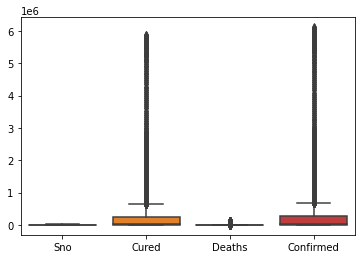

In [51]:
sns.boxplot(data=df)

#### Observation: Through boxplot we came to know our dataset contain no outliers

In [52]:
death=df.groupby('Date').sum()['Deaths'].reset_index()
death

,Date,Deaths
0,2020-01-30,0
1,2020-01-31,0
2,2020-02-01,0
3,2020-02-02,0
4,2020-02-03,0
...,...,...
520,2021-07-03,401050
521,2021-07-04,402005
522,2021-07-05,402728
523,2021-07-06,403281


#### Observation: Datewise deaths cases of covid

In [53]:
confirmed=df.groupby('Date').sum()['Confirmed'].reset_index()
confirmed

,Date,Confirmed
0,2020-01-30,1
1,2020-01-31,1
2,2020-02-01,2
3,2020-02-02,3
4,2020-02-03,3
...,...,...
520,2021-07-03,30502362
521,2021-07-04,30545433
522,2021-07-05,30585229
523,2021-07-06,30619932


#### Observation: Datewise confirmed cases of covid.

In [54]:
cured=df.groupby('Date').sum()['Cured'].reset_index()
cured

,Date,Cured
0,2020-01-30,0
1,2020-01-31,0
2,2020-02-01,0
3,2020-02-02,0
4,2020-02-03,0
...,...,...
520,2021-07-03,29605779
521,2021-07-04,29658078
522,2021-07-05,29700430
523,2021-07-06,29752294


#### Observation: Datewise Cured cases of covid.

In [55]:
d=df.groupby(df["State/UnionTerritory"])["Deaths"].max()
d.sort_values(ascending=False)

State/UnionTerritory
Maharashtra                                 123531
Karnataka                                    35526
Tamil Nadu                                   33132
Delhi                                        25001
Uttar Pradesh                                22656
West Bengal                                  17834
Punjab                                       16131
Kerala                                       13960
Chhattisgarh                                 13462
Andhra Pradesh                               12898
Gujarat                                      10072
Bihar                                         9612
Haryana                                       9506
Madhya Pradesh                                9017
Rajasthan                                     8942
Uttarakhand                                   7338
Jharkhand                                     5118
Assam                                         4717
Jammu and Kashmir                             4345
Odisha    

In [70]:
c=df.groupby(df["State/UnionTerritory"])["Confirmed"].max()
c.sort_values(ascending=False)

State/UnionTerritory
Maharashtra                                 6113335
Kerala                                      2996094
Karnataka                                   2859595
Tamil Nadu                                  2503481
Andhra Pradesh                              1908065
Uttar Pradesh                               1706818
West Bengal                                 1507241
Delhi                                       1434687
Chhattisgarh                                 996359
Rajasthan                                    952836
Odisha                                       927186
Gujarat                                      823964
Madhya Pradesh                               790042
Haryana                                      769030
Bihar                                        722746
Telangana                                    628282
Punjab                                       596736
Assam                                        522267
Telengana                                  

In [57]:
cu=df.groupby(df["State/UnionTerritory"])["Cured"].max()

In [58]:
cu.sort_values(ascending=False)

State/UnionTerritory
Maharashtra                                 5872268
Kerala                                      2877557
Karnataka                                   2784030
Tamil Nadu                                  2435872
Andhra Pradesh                              1861937
Uttar Pradesh                               1682130
West Bengal                                 1472132
Delhi                                       1408853
Chhattisgarh                                 977893
Rajasthan                                    942882
Odisha                                       897362
Gujarat                                      811699
Madhya Pradesh                               780578
Haryana                                      758442
Bihar                                        711913
Telangana                                    613124
Punjab                                       578590
Assam                                        493306
Telengana                                  

## EDA of Covid vaccine statewise

In [130]:
df1.head(5)

,Updated On,State,Total Doses Administered,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,Total Sputnik V Administered,AEFI,18-45 years (Age),45-60 years (Age),60+ years (Age),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,23757.0,24517.0,2.0,579.0,47697.0,NaN,NaN,NaN,NaN,NaN,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,27348.0,31252.0,4.0,635.0,57969.0,NaN,NaN,NaN,NaN,NaN,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,41361.0,58083.0,5.0,1299.0,98150.0,NaN,NaN,NaN,NaN,NaN,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,81901.0,113613.0,11.0,3017.0,192508.0,NaN,NaN,NaN,NaN,NaN,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,98111.0,153145.0,24.0,3946.0,247334.0,NaN,NaN,NaN,NaN,NaN,251280.0


In [131]:
df1.shape

(6699, 18)

In [132]:
df1['State'].unique()

array(['India', 'Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli and Daman and Diu',
       'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh',
       'Lakshadweep', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

In [133]:
df1['State'].value_counts()

India                                       183
Sikkim                                      181
Madhya Pradesh                              181
Chandigarh                                  181
Meghalaya                                   181
Himachal Pradesh                            181
Mizoram                                     181
Kerala                                      181
Rajasthan                                   181
Gujarat                                     181
Puducherry                                  181
Uttarakhand                                 181
Lakshadweep                                 181
Manipur                                     181
Odisha                                      181
Dadra and Nagar Haveli and Daman and Diu    181
Maharashtra                                 181
Andhra Pradesh                              181
Ladakh                                      181
Chhattisgarh                                181
Andaman and Nicobar Islands             

In [141]:
df1=df1.replace({'India':'Sikkim'})
df1

,Updated On,State,Total Doses Administered,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,Total Sputnik V Administered,AEFI,18-45 years (Age),45-60 years (Age),60+ years (Age),Total Individuals Vaccinated
0,16/01/2021,Sikkim,48276.0,3455.0,2957.0,48276.0,0.0,23757.0,24517.0,2.0,579.0,47697.0,NaN,NaN,NaN,NaN,NaN,48276.0
1,17/01/2021,Sikkim,58604.0,8532.0,4954.0,58604.0,0.0,27348.0,31252.0,4.0,635.0,57969.0,NaN,NaN,NaN,NaN,NaN,58604.0
2,18/01/2021,Sikkim,99449.0,13611.0,6583.0,99449.0,0.0,41361.0,58083.0,5.0,1299.0,98150.0,NaN,NaN,NaN,NaN,NaN,99449.0
3,19/01/2021,Sikkim,195525.0,17855.0,7951.0,195525.0,0.0,81901.0,113613.0,11.0,3017.0,192508.0,NaN,NaN,NaN,NaN,NaN,195525.0
4,20/01/2021,Sikkim,251280.0,25472.0,10504.0,251280.0,0.0,98111.0,153145.0,24.0,3946.0,247334.0,NaN,NaN,NaN,NaN,NaN,251280.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6694,11/07/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6695,12/07/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6696,13/07/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6697,14/07/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Observation:Replacing India with Sikkim 

In [142]:
 df1.describe(include="all")

,Updated On,State,Total Doses Administered,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,Total Sputnik V Administered,AEFI,18-45 years (Age),45-60 years (Age),60+ years (Age),Total Individuals Vaccinated
count,6699,6699,6.364000e+03,6.363000e+03,6363.000000,6.363000e+03,6.363000e+03,6.363000e+03,6.363000e+03,6363.000000,6.363000e+03,6.363000e+03,1737.000000,4180.000000,4.177000e+03,4.178000e+03,4.178000e+03,6.363000e+03
unique,183,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,04/06/2021,Sikkim,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,37,364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,6.413310e+06,3.957716e+05,2360.343549,5.254151e+06,1.160167e+06,2.919990e+06,2.568098e+06,835.393368,6.928136e+05,5.707424e+06,2066.254462,1073.564833,1.955834e+06,3.275439e+06,2.887759e+06,5.265380e+06
std,NaN,NaN,2.615880e+07,1.656387e+06,7508.979436,2.132565e+07,4.882363e+06,1.225694e+07,1.064744e+07,3737.993697,2.991176e+06,2.319046e+07,9614.132634,3246.612821,8.448696e+06,1.095290e+07,9.204842e+06,2.132828e+07
min,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,7.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000,0.000000e+00,7.000000e+00,0.000000,0.000000,1.059000e+03,1.136000e+03,5.580000e+02,7.000000e+00
25%,NaN,NaN,9.749425e+04,4.498000e+03,70.500000,8.277550e+04,6.405500e+03,4.299600e+04,3.760850e+04,4.000000,0.000000e+00,9.561450e+04,0.000000,94.000000,6.454900e+04,1.017950e+05,6.404975e+04,8.277550e+04
50%,NaN,NaN,5.369145e+05,2.588400e+04,616.000000,4.589680e+05,7.715800e+04,2.581390e+05,2.392390e+05,69.000000,4.760000e+03,4.989140e+05,0.000000,283.000000,3.382580e+05,9.198940e+05,8.211470e+05,4.705490e+05
75%,NaN,NaN,4.872305e+06,2.613895e+05,1790.000000,4.119336e+06,7.264175e+05,2.203892e+06,1.961909e+06,562.000000,4.669140e+05,4.258910e+06,79.000000,716.000000,1.068349e+06,2.727498e+06,2.533357e+06,4.119336e+06


In [143]:
df1.isnull().sum()

Updated On                                0
State                                     0
Total Doses Administered                335
Total Sessions Conducted                336
Total Sites                             336
First Dose Administered                 336
Second Dose Administered                336
Male(Individuals Vaccinated)            336
Female(Individuals Vaccinated)          336
Transgender(Individuals Vaccinated)     336
Total Covaxin Administered              336
Total CoviShield Administered           336
Total Sputnik V Administered           4962
AEFI                                   2519
18-45 years (Age)                      2522
45-60 years (Age)                      2521
60+ years (Age)                        2521
Total Individuals Vaccinated            336
dtype: int64

<AxesSubplot:>

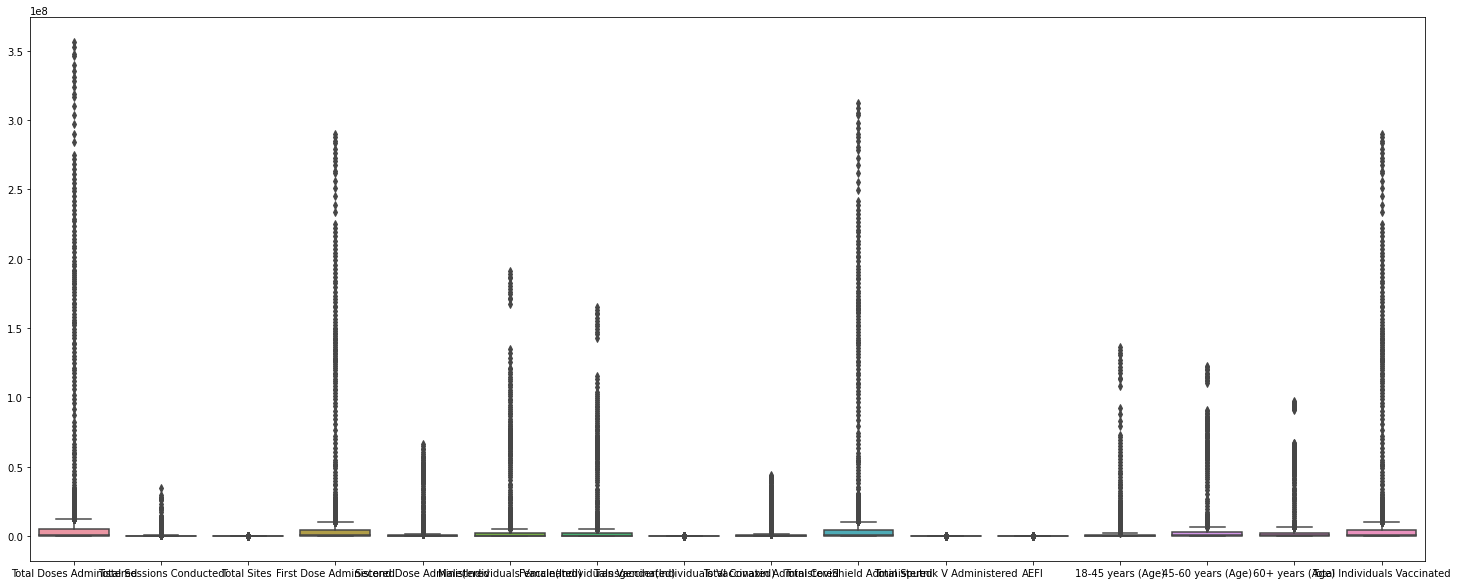

In [144]:
fig,ax=plt.subplots(figsize=(25,10))
sns.boxplot(data=df1)

#### Observation:Our dataset mostly features contain outliers so we will replace null values with median

In [145]:
df1.fillna(df1.median())

,Updated On,State,Total Doses Administered,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,Total Sputnik V Administered,AEFI,18-45 years (Age),45-60 years (Age),60+ years (Age),Total Individuals Vaccinated
0,16/01/2021,Sikkim,48276.0,3455.0,2957.0,48276.0,0.0,23757.0,24517.0,2.0,579.0,47697.0,0.0,283.0,338258.0,919894.0,821147.0,48276.0
1,17/01/2021,Sikkim,58604.0,8532.0,4954.0,58604.0,0.0,27348.0,31252.0,4.0,635.0,57969.0,0.0,283.0,338258.0,919894.0,821147.0,58604.0
2,18/01/2021,Sikkim,99449.0,13611.0,6583.0,99449.0,0.0,41361.0,58083.0,5.0,1299.0,98150.0,0.0,283.0,338258.0,919894.0,821147.0,99449.0
3,19/01/2021,Sikkim,195525.0,17855.0,7951.0,195525.0,0.0,81901.0,113613.0,11.0,3017.0,192508.0,0.0,283.0,338258.0,919894.0,821147.0,195525.0
4,20/01/2021,Sikkim,251280.0,25472.0,10504.0,251280.0,0.0,98111.0,153145.0,24.0,3946.0,247334.0,0.0,283.0,338258.0,919894.0,821147.0,251280.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6694,11/07/2021,West Bengal,536914.5,25884.0,616.0,458968.0,77158.0,258139.0,239239.0,69.0,4760.0,498914.0,0.0,283.0,338258.0,919894.0,821147.0,470549.0
6695,12/07/2021,West Bengal,536914.5,25884.0,616.0,458968.0,77158.0,258139.0,239239.0,69.0,4760.0,498914.0,0.0,283.0,338258.0,919894.0,821147.0,470549.0
6696,13/07/2021,West Bengal,536914.5,25884.0,616.0,458968.0,77158.0,258139.0,239239.0,69.0,4760.0,498914.0,0.0,283.0,338258.0,919894.0,821147.0,470549.0
6697,14/07/2021,West Bengal,536914.5,25884.0,616.0,458968.0,77158.0,258139.0,239239.0,69.0,4760.0,498914.0,0.0,283.0,338258.0,919894.0,821147.0,470549.0


In [146]:
tmv=df1.groupby('State')['Male(Individuals Vaccinated)'].max()
tmv.sort_values(ascending=False)

State
Sikkim                                      191160373.0
Uttar Pradesh                                19811048.0
Maharashtra                                  18892329.0
Gujarat                                      14862377.0
Rajasthan                                    13765951.0
West Bengal                                  12896789.0
Karnataka                                    12419827.0
Madhya Pradesh                               12265543.0
Bihar                                         9607873.0
Tamil Nadu                                    9038014.0
Andhra Pradesh                                7555484.0
Kerala                                        7237725.0
Odisha                                        6967605.0
Telangana                                     6231169.0
Haryana                                       5291607.0
Delhi                                         4916611.0
Chhattisgarh                                  4507844.0
Assam                                     

In [147]:
tfv=df1.groupby('State')['Female(Individuals Vaccinated)'].max()
tfv.sort_values(ascending=False)

State
Sikkim                                      164971125.0
Maharashtra                                  15905165.0
Uttar Pradesh                                14693569.0
Gujarat                                      12465349.0
Rajasthan                                    12078009.0
Karnataka                                    12053357.0
West Bengal                                  10305169.0
Madhya Pradesh                                9759137.0
Andhra Pradesh                                9075840.0
Tamil Nadu                                    7976534.0
Bihar                                         7915722.0
Kerala                                        7822183.0
Odisha                                        5953553.0
Telangana                                     5732962.0
Chhattisgarh                                  4535688.0
Haryana                                       4288547.0
Delhi                                         3580008.0
Assam                                     

In [148]:
tmv=df1.groupby('State')['Transgender(Individuals Vaccinated)'].max()
tmv.sort_values(ascending=False)

State
Sikkim                                      61451.0
Uttar Pradesh                                9117.0
Maharashtra                                  5048.0
Rajasthan                                    4274.0
Karnataka                                    4058.0
Gujarat                                      4026.0
Madhya Pradesh                               3815.0
West Bengal                                  3255.0
Bihar                                        3250.0
Tamil Nadu                                   2674.0
Andhra Pradesh                               2600.0
Kerala                                       2408.0
Odisha                                       2345.0
Telangana                                    2199.0
Delhi                                        1760.0
Haryana                                      1732.0
Uttarakhand                                  1371.0
Jharkhand                                    1253.0
Assam                                        1125.0
Chhatt

# Statewise Testing Details of Covid

In [105]:
df2.head(5)

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0


In [120]:
df2['State'].unique()

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli and Daman and Diu',
       'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh',
       'Lakshadweep', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

In [116]:
df2.isnull().sum()

Date               0
State              0
TotalSamples       0
Negative        9524
Positive        9524
dtype: int64

In [107]:
df2.shape

(15113, 5)

In [108]:
df2.describe()

,TotalSamples,Positive
count,1.511300e+04,5.589000e+03
mean,4.675773e+06,5.444224e+04
std,7.606151e+06,1.647919e+05
min,5.800000e+01,0.000000e+00
25%,1.436260e+05,5.210000e+02
50%,7.701740e+05,4.595000e+03
75%,6.414658e+06,3.335200e+04
max,5.933166e+07,1.638961e+06


In [109]:
d=df2['Negative']

In [111]:
d.isnull().sum()

8456

In [112]:
df2['Negative']=df2['TotalSamples']-df2['Positive']

In [115]:
df2

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1391.0,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,2652.0,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,2815.0,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,3721.0,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,6644.0,33.0
...,...,...,...,...,...
15108,2021-07-02,West Bengal,14325099.0,NaN,NaN
15109,2021-07-03,West Bengal,14377860.0,NaN,NaN
15110,2021-07-04,West Bengal,14430084.0,NaN,NaN
15111,2021-07-05,West Bengal,14470472.0,NaN,NaN


In [118]:
df2.fillna(df2.median())

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1391.0,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,2652.0,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,2815.0,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,3721.0,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,6644.0,33.0
...,...,...,...,...,...
15108,2021-07-02,West Bengal,14325099.0,148665.0,4595.0
15109,2021-07-03,West Bengal,14377860.0,148665.0,4595.0
15110,2021-07-04,West Bengal,14430084.0,148665.0,4595.0
15111,2021-07-05,West Bengal,14470472.0,148665.0,4595.0


C:\Users\Aparna Yadav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Negative', ylabel='Positive'>

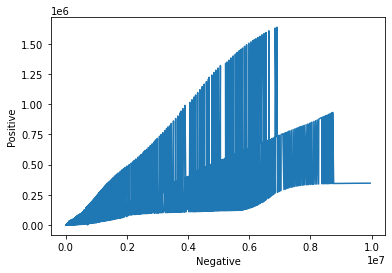

In [119]:
sns.lineplot(df2['Negative'],df2['Positive'],data=df2)

In [125]:
s=df2.groupby('State')['Positive'].max()
s.sort_values(ascending=False)

State
Maharashtra                                 1638961.0
Kerala                                       932639.0
Tamil Nadu                                   367430.0
Jharkhand                                    346038.0
Haryana                                      275137.0
Karnataka                                    264546.0
Andhra Pradesh                               235525.0
Delhi                                        151928.0
Gujarat                                      136004.0
West Bengal                                  135596.0
Uttar Pradesh                                126722.0
Telangana                                    124963.0
Punjab                                       124535.0
Odisha                                        97920.0
Bihar                                         90553.0
Assam                                         87908.0
Tripura                                       68148.0
Rajasthan                                     67954.0
Madhya Pradesh        

In [126]:
neg=df2.groupby('State')['Negative'].max()
neg.sort_values(ascending=False)

State
Jharkhand                                   9952072.0
Kerala                                      8726853.0
Maharashtra                                 6909075.0
Haryana                                     5638736.0
Gujarat                                     4220058.0
Tamil Nadu                                  3695513.0
Uttar Pradesh                               3082865.0
Andhra Pradesh                              2298779.0
Karnataka                                   2049939.0
Punjab                                      2043196.0
Rajasthan                                   1994155.0
Assam                                       1842856.0
Odisha                                      1572990.0
West Bengal                                 1388566.0
Tripura                                     1258247.0
Telangana                                   1240619.0
Bihar                                       1182427.0
Delhi                                       1139483.0
Madhya Pradesh        